In [6]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [62]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [63]:
import matplotlib.pyplot as plt
import numpy as np

## An Example Carnot Cycle

Using the *ideal gas law*, the Carnot cycle (heat pump) has four P/V (pressure/volume) states:

a. $P_a$, $V_a$, $T_{hot}$ and $n$

b. $P_b$, $V_b$, $T_{hot}$ and $n$

c. $P_c$, $V_c$, $T_{cold}$ and $n$

d. $P_d$, $V_d$, $T_{cold}$ and $n$

The transitions between states have the following thermodynamic relations:

1. A **hot** **reversible** and **isothermal** expansion (*points a -> b*).

    |                                             |                                               |
    |---------------------------------------------|-----------------------------------------------|
    | $\Delta U = q + w = 0$                      | (isothermal)                                  |
    | $q_{rev} = - w_{rev}$                       | (isothermal)                                  |
    | $w_{rev} = -nRT_{hot} \ln \tfrac{V_f}{V_i}$ | (isothermal reversible expansion/compression) |

2. An **adiabatic** **reversible** cooling (*points b->c*)

    |                           |                               |
    |---------------------------|-------------------------------|
    | $q = 0$                   | (adiabatic)                   |
    | $\Delta U = C_v \Delta T$ | (state function--always true) |
    | $\Delta U = w$            | (adiabatic)                   |

3. A **cold** **reversible** and **isothermal** compression (*points c->d*)

    |                                             |                                               |
    |---------------------------------------------|-----------------------------------------------|
    | $\Delta U = q + w = 0$                      | (isothermal)                                  |
    | $q_{rev} = - w_{rev}$                       | (isothermal)                                  |
    | $w_{rev} = -nRT_{cold} \ln \tfrac{V_f}{V_i}$ | (isothermal reversible expansion/compression) |

4. An **adiabatic** **reversible** heating (*points d->a*)

    |                           |                               |
    |---------------------------|-------------------------------|
    | $q = 0$                   | (adiabatic)                   |
    | $\Delta U = C_v \Delta T$ | (state function--always true) |
    | $\Delta U = w$            | (adiabatic)                   |


### Initial Conditions

For an example Carnot cycle, we choose the initial values of $n$, $T_{hot}$, $T_{cold}$, $V_a$, $V_b$.

In [9]:
n = 1.00  # moles
Thot = 498  # Kelvin
Tcold = 98  # Kelvin
Va = 1.0  # liter
Vb = 10.0  # liter
R = 0.08314  # L bar mol^-1 K^-1

Additionally, we will need the heat capacity ratio ($\gamma$), which is constructed from the specific heat capacity at constant volume ($C_v$) and the specific heat capacity at constant pressure ($C_p$).

$\gamma = C_p / C_v $

For an ideal gas, $C_v = \tfrac{3}{2} R$ and $C_p = \tfrac{5}{2} R$, where $R$ is the ideal gas constant.

In [16]:
gamma = (5./ 3.) * 8.314  # J mol^-1 K^-1

print(f"gamma = {gamma:.3f} J mol^-1 K^-1")

gamma = 13.857 J mol^-1 K^-1


The pressures $P_a$ and $P_b$ are calculated using the ideal gas law.

In [17]:
Pa = n * R * Thot / Va
Pb = n * R * Thot / Vb

print(f"Pa = {Pa:.1f} bar")
print(f"Pb = {Pb:.2f} bar")

Pa = 41.4 bar
Pb = 4.14 bar


The pressure $P_c$ and volume $V_c$ are calculated from an adiabatic expansion, where the coefficient $ \gamma = C_p / C_v$:

$P_b V_b^\gamma = P_c V_c^\gamma$

However, the above equation has 2 unknowns ($P_c$ and $V_c$). Instead, we can frame this equation in terms of the $T_{hot}$ and $T_{cold}$ using the ideal gas law.

$\left(\frac{n R T_{hot}}{V_b} \right) V_b^\gamma = \left(\frac{n R T_{cold}}{V_c} \right) V_c^\gamma $

$ T_{hot} V_b^{\gamma -1} = T_{cold} V_c^{\gamma - 1}$

$ V_c = \left( \frac{T_{hot}}{T_{cold}} V_b^{\gamma - 1} \right)^\frac{1}{\gamma-1}$

In [18]:
Vc = ((Thot / Tcold) * Vb**(gamma - 1.)) ** (1./(gamma - 1.))

print(f"Vc = {Vc:.1f} liter")

Vc = 11.3 liter


Therafter, the pressure $P_c$ is calculated using the ideal gas law.

In [19]:
Pc = n * R * Tcold / Vc

print(f"Pc = {Pc:.2f} bar")

Pc = 0.72 bar


Likewise, the volume $V_d$ and pressure $P_d$ are calculated from an adiabatic expansion from $P_a$, $V_a$ and $T_{hot}$.

In [24]:
Vd = ((Thot / Tcold) * Va**(gamma - 1.)) ** (1./(gamma - 1.))

print(f"Vd = {Vd:.2f} liters")

Vd = 1.13 liters


In [104]:
Pd = n * R * Tcold / Vd

print(f"Pd = {Pd:.1f} bar")

Pd = 7.2 bar


We not have the n, R, T, V and P parameters for all four states (a, b, c, d):

In [105]:
states = {
    "a": (n, Pa, Va, Thot),
    "b": (n, Pb, Vb, Thot),
    "c": (n, Pc, Vc, Tcold),
    "d": (n, Pd, Vd, Tcold)
}

print(" state" + " "*2 + "|"
      " moles" + " " *4 + "|"
      " pressure" + " "*5 + "|"
      " volume" + " "*6 + "|"
      " temperature")
print("-" * 62)

for state, (n, P, V, T) in states.items():
    print(f" {state:<6} | {n:4.2f} mol | {P:8.2f} bar | {V:5.2f} liter | {T:5.1f} K")

 state  | moles    | pressure     | volume      | temperature
--------------------------------------------------------------
 a      | 1.00 mol |    41.40 bar |  1.00 liter | 498.0 K
 b      | 1.00 mol |     4.14 bar | 10.00 liter | 498.0 K
 c      | 1.00 mol |     0.72 bar | 11.35 liter |  98.0 K
 d      | 1.00 mol |     7.18 bar |  1.13 liter |  98.0 K


### P-V Plot

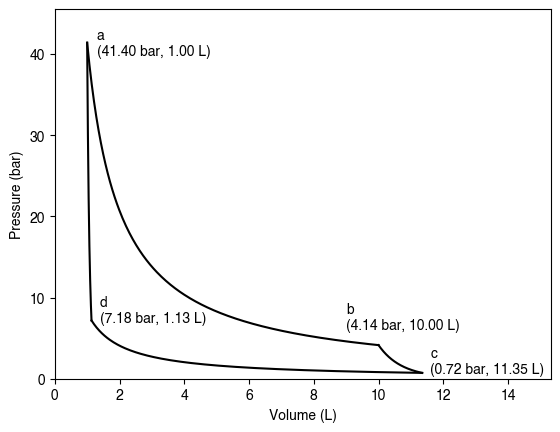

In [110]:
N = 256  # number of points

# Setup plot
plt.xlabel("Volume (L)")
plt.xlim((0., Vc*1.35))

plt.ylabel("Pressure (bar)")
plt.ylim((0., Pa*1.10))

# Transition a->b
Vab = np.linspace(Va, Vb, N)
Pab = n * R * Thot / Vab  # P = nRT / V
plt.plot(Vab, Pab, color='k')
plt.annotate(f"a\n({Pa:.2f} bar, {Va:.2f} L)", (Va + 0.3, Pa - 1.5))

# Transition b->c
Vbc = np.linspace(Vb, Vc, N)
Pbc = Pb * (Vb / Vbc) ** gamma  # P = Pi (Vi/V)^gamma
plt.plot(Vbc, Pbc, color='k')
plt.annotate(f"b\n({Pb:.2f} bar, {Vb:.2f} L)", (Vb - 1., Pb + 2))

# Transition c->d
Vcd = np.linspace(Vc, Vd, N)
Pcd = n * R * Tcold / Vcd  # P = nRT / V
plt.plot(Vcd, Pcd, color='k') 
plt.annotate(f"c\n({Pc:.2f} bar, {Vc:.2f} L)", (Vc + 0.25, Pc + 0))

# Transition d->a
Vda = np.linspace(Va, Vd, N)
Pda = Pa * (Va / Vda) ** gamma  # P = Pi (Vi/V)^gamma
plt.plot(Vda, Pda, color='k') 
plt.annotate(f"d\n({Pd:.2f} bar, {Vd:.2f} L)", (Vd + 0.25, Pd + -.25))

plt.show()

### Energy Calculations

In [164]:
E = dict()

# Transition a->b (isothermal, reversible)
Ei = E.setdefault("ab", dict())
Ei["w"] = n * R * Thot * np.log(Vb/Va)
Ei["q"] = -Ei["w"]
Ei["∆U"] = 0  # Cv ∆T
Ei["∆H"] = 0  # Cp ∆T
Ei["∆S"] = Ei["q"]/Thot

# Transition b->c (adiabatic)
Ei = E.setdefault("bc", dict())
Ei["∆U"] = 1.5 * R * (Tcold - Thot)  # Cv ∆T
Ei["∆H"] = 2.5 * R * (Tcold - Thot)  # Cp ∆T
Ei["w"] = Ei["∆U"]
Ei["q"] = 0
Ei["∆S"] = 0

# Transition c->d (isothermal, reversible)
Ei = E.setdefault("cd", dict())
Ei["w"] = n * R * Tcold * np.log(Vd/Vc)
Ei["q"] = -Ei["w"]
Ei["∆U"] = 0  # Cv ∆T
Ei["∆H"] = 0  # Cp ∆T
Ei["∆S"] = Ei["q"]/Tcold

# Transition d->a (adiabatic)
Ei = E.setdefault("da", dict())
Ei["∆U"] = 1.5 * R * (Thot - Tcold)  # Cv ∆T
Ei["∆H"] = 2.5 * R * (Thot - Tcold)  # Cp ∆T
Ei["w"] = Ei["∆U"]
Ei["q"] = 0
Ei["∆S"] = 0

In [208]:
print("Transition".ljust(12) +
      "Work (w)".rjust(11) +
      "Heat (q)".rjust(11) +
      "∆U".rjust(11) +
      "∆H".rjust(11) +
      "∆S".rjust(13)
     )
print("-"*69)
wnet = 0.0
qnet = 0.0
dUnet = 0.0
dHnet = 0.0
dSnet = 0.0

for transition, Ei in E.items():
    start, end = transition
    wnet += Ei["w"]
    qnet += Ei["q"]
    dUnet += Ei["∆U"]
    dHnet += Ei["∆H"]
    dSnet += Ei["∆S"]
    
    print(f"{start} -> {end}".ljust(12) +
          f" {Ei['w']:-8.1f} J"
          f" {Ei['q']:-8.1f} J"
          f" {Ei['∆U']:-8.1f} J"
          f" {Ei['∆H']:-8.1f} J"
          f" {Ei['∆S']:-8.3f} J/K"
          )

print("-"*69)
print(f"net".ljust(12) +
          f" {wnet:-8.1f} J"
          f" {qnet:-8.1f} J"
          f" {dUnet:-8.1f} J"
          f" {dHnet:-8.1f} J"
          f" {dSnet:-8.3f} J/K"
          )

Transition     Work (w)   Heat (q)         ∆U         ∆H           ∆S
---------------------------------------------------------------------
a -> b           95.3 J    -95.3 J      0.0 J      0.0 J   -0.191 J/K
b -> c          -49.9 J      0.0 J    -49.9 J    -83.1 J    0.000 J/K
c -> d          -18.8 J     18.8 J      0.0 J      0.0 J    0.191 J/K
d -> a           49.9 J      0.0 J     49.9 J     83.1 J    0.000 J/K
---------------------------------------------------------------------
net              76.6 J    -76.6 J      0.0 J      0.0 J    0.000 J/K
